## Random Forest Model Train & Test

### 1. Load the Dataset and Prepare for Model Training

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('../../data/15000_spotify_tracks.csv')

# Prepare features (X) and target (y), dropping unnecessary columns
X = df.drop(columns=['Track', 'Artist', 'Genre'])  # Adjust if necessary
y = df['Genre']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Train the Random Forest Classifier

In [2]:
# Instantiate and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3. Evaluate the Model

In [3]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 53.49%
              precision    recall  f1-score   support

   Alt. Rock       0.47      0.21      0.29       243
       Blues       0.53      0.27      0.36       190
     Country       0.44      0.35      0.39       241
       Disco       0.50      0.51      0.50       200
         EDM       0.68      0.73      0.70       219
        Folk       0.46      0.31      0.37       189
        Funk       0.16      0.08      0.11       110
      Gospel       0.70      0.38      0.49       102
        Jazz       0.59      0.75      0.66       224
       Metal       0.55      0.67      0.61       269
         Pop       0.54      0.80      0.64      1116
        Punk       0.63      0.64      0.63       249
         R&B       0.26      0.10      0.14       242
         Rap       0.63      0.66      0.65       225
      Reggae       0.52      0.34      0.41       126
        Rock       0.39      0.37      0.38       230
         SKA       0.48      0.23      0.31       113
       Tod

### 4. Handle Class Imbalance with SMOTE

In [4]:
# Install imbalanced-learn if necessary
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train the model on the balanced data
rf_classifier_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_res.fit(X_train_res, y_train_res)

# Make predictions on the test set again
y_pred_res = rf_classifier_res.predict(X_test)

# Evaluate the new model
accuracy_res = accuracy_score(y_test, y_pred_res)
print(f'Balanced Accuracy: {accuracy_res * 100:.2f}%')
print(classification_report(y_test, y_pred_res))

Balanced Accuracy: 50.45%
              precision    recall  f1-score   support

   Alt. Rock       0.35      0.33      0.34       243
       Blues       0.51      0.39      0.44       190
     Country       0.38      0.47      0.42       241
       Disco       0.49      0.56      0.52       200
         EDM       0.73      0.67      0.70       219
        Folk       0.35      0.41      0.38       189
        Funk       0.21      0.21      0.21       110
      Gospel       0.37      0.56      0.45       102
        Jazz       0.64      0.68      0.66       224
       Metal       0.54      0.62      0.57       269
         Pop       0.71      0.51      0.59      1116
        Punk       0.58      0.67      0.62       249
         R&B       0.21      0.20      0.20       242
         Rap       0.63      0.68      0.65       225
      Reggae       0.36      0.50      0.42       126
        Rock       0.40      0.38      0.39       230
         SKA       0.38      0.40      0.39       113
 

### 5. Hyperparameter Tuning Using GridSearchCV

In [5]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_rf.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Accuracy: {accuracy_best * 100:.2f}%')
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Accuracy: 54.43%
              precision    recall  f1-score   support

   Alt. Rock       0.51      0.22      0.31       243
       Blues       0.55      0.31      0.39       190
     Country       0.47      0.32      0.38       241
       Disco       0.52      0.51      0.51       200
         EDM       0.70      0.74      0.72       219
        Folk       0.51      0.31      0.38       189
        Funk       0.14      0.05      0.08       110
      Gospel       0.61      0.35      0.45       102
        Jazz       0.63      0.76      0.69       224
       Metal       0.55      0.66      0.60       269
         Pop       0.53      0.83      0.65      1116
        Punk       0.64      0.62      0.63       249
         R&B       0.33      0.12      0.18       242
         Rap       0.65      0.68      0.66       225
      Reggae       0.52      0.33      0.40       126
        Rock       0.42      0.42      0.42       

### 6. Feature Importance

Use the Random Forest’s feature importance attribute to visualize which features contribute most to the predictions.

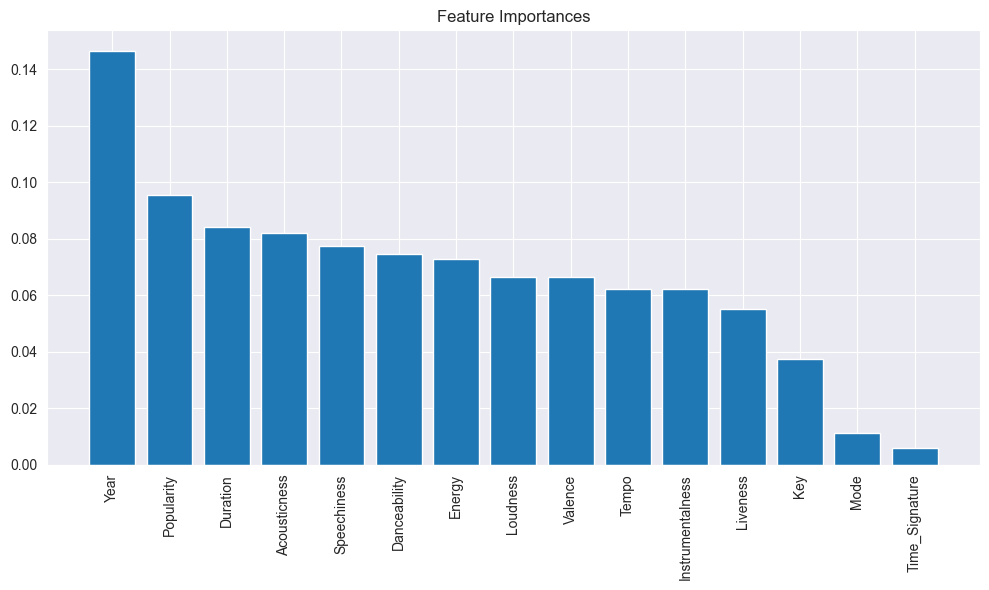

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

### 7. Cross-Validation

Cross-validation will help get a better estimate of model performance by evaluating it on multiple data splits.

In [7]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print(f"Cross-validated accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-validated accuracy: 0.52 ± 0.01
